
## Table of Contents

    Assignment
    Data Exploration and Processing
        Statistical Summary
    Non-Graphical Analysis
        Value Counts
        Unique Attributes
    Graphical Analysis
        Univariate Analysis - Numerical Variables
        Univariate Analysis - Categorical Variables
        Bivariate Analysis
        Multivariate Analysis
    Correlation Analysis
    Marginal & Conditional Probabilities
    Outlier Detection
    Actionable Insights & Recommendations



In [1]:
##Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
import math
import statistics
sns.set(color_codes = True)

In [2]:
## load and read the data
df = pd.read_csv('aerofit_treadmill_data.csv')
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


- Result show that:
    Age --> majority in the range of 30s and the olders is 50
    


In [3]:
# check columns
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [4]:
## check data types 
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
## define a function that converts to category

def convert_to_category(df, *cols):
    for col in cols:
        df[col] = df[col].astype('category')
## Apply in the columns
convert_to_category(df, ['Gender', 'Product', 'MaritalStatus'])


## check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [6]:
## check the statistical description
df.describe(include='all') 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000




#### Observations:

-  There are no missing values in the data.
- There are 3 unique products in the dataset.
- KP281 is the most frequent product.
- Minimum & Maximum age of the person is 18 & 50, mean is 28.79, and 75% of persons have an age less than or equal to 33.
- Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
- Out of 180 data points, 104's gender is Male and rest are the Female.
- Standard deviation for Income & Miles is very high. These variables might have outliers in them.



In [7]:
## check if there is any null values

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Graphical Analysis


### Univariate Analysis - Numerical Variables 

- Let's start our graphical analysis by generating six separate distribution plots (histograms with Kernel Density Estimation - KDE overlay), one for each column from the aerofit_df DataFrame. Each of these plots provides a graphical representation of the distribution of the values in the respective column.


<Axes: xlabel='Miles', ylabel='Density'>

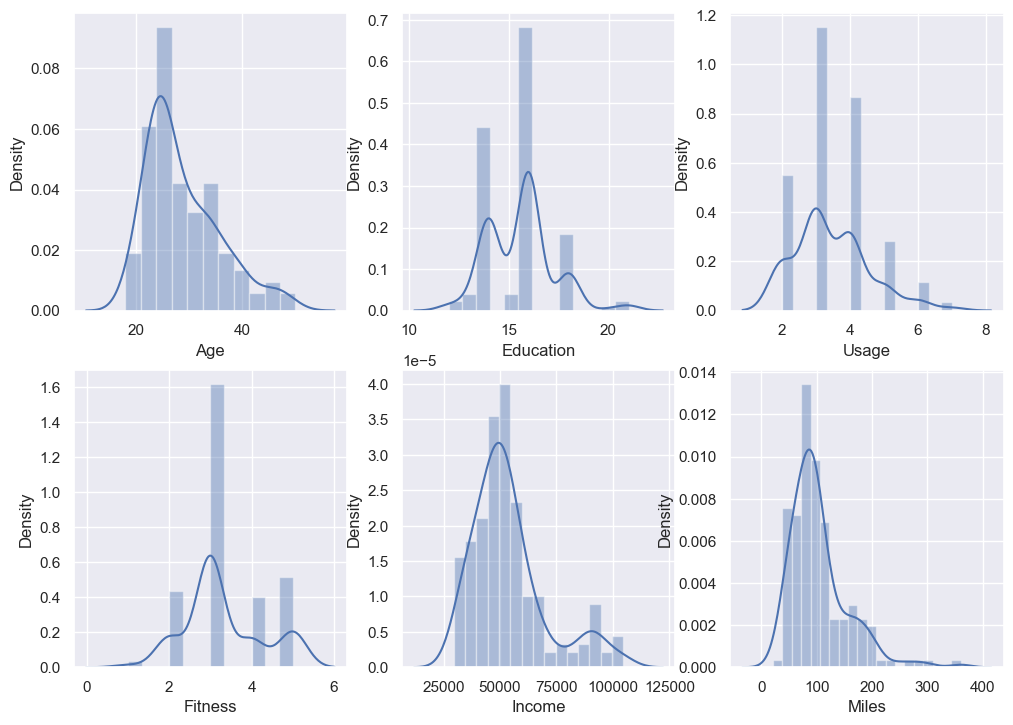

In [8]:
### Distance plot 

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.subplots_adjust(top=1.2)  # You might need to adjust this based on your output

sns.distplot(df['Age'], kde=True, ax=axis[0, 0])
sns.distplot(df['Education'], kde=True, ax=axis[0, 1])
sns.distplot(df['Usage'], kde=True, ax=axis[0, 2])
sns.distplot(df['Fitness'], kde=True, ax=axis[1, 0])
sns.distplot(df['Income'], kde=True, ax=axis[1, 1])
sns.distplot(df['Miles'], kde=True, ax=axis[1, 2])

**Observations:**

- **Both Miles and Income:** Significant outliers are noticeable in the distributions of both Miles and Income.

- **Right-Skewed Distribution:** Miles and Income exhibit a right-skewed distribution, which means the mass of the distribution is concentrated on the left of the figure.

- **Fitness Level Purchases:** Customers with a fitness level of 3 purchase a major chunk of treadmills.

- **Income Range:** The majority of customers fall within the $45,000 - $60,000 income range.



##### Count Plot

We can also display the count plots. While the distance plot displays the distribution of the data as a histogram and an overlaid kernel density estimate (KDE) which gives a smoothed line over the histogram, the count plot displays the number of occurrences (counts) of each category in the given dataset. In other words, it shows the frequency distribution of a categorical variable. It is generally used for categorical data but given small number of unique numbers such as in our case, it can also be used to visualize numeric data.


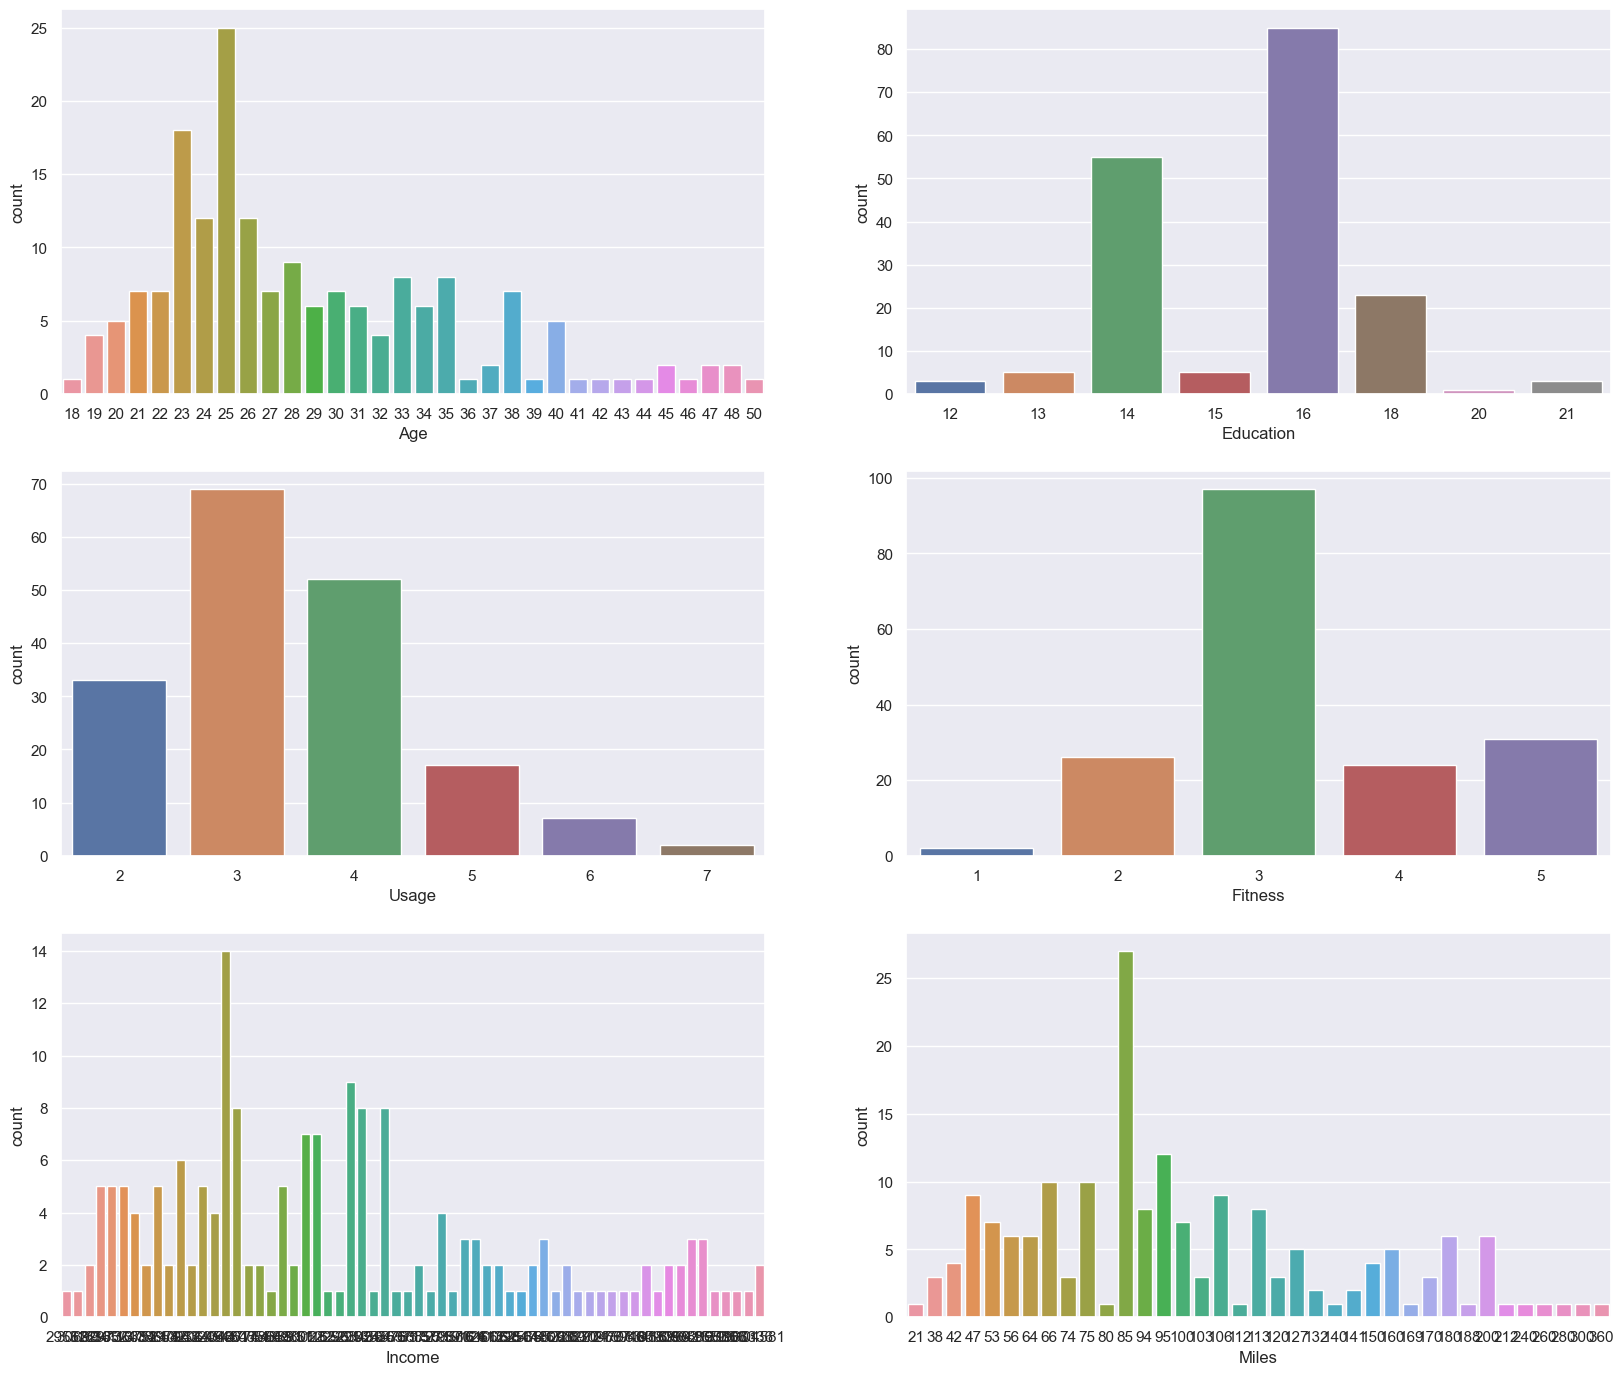

In [9]:

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0,0])
sns.countplot(data=df, x="Education", ax=axis[0,1])
sns.countplot(data=df, x="Usage", ax=axis[1,0])
sns.countplot(data=df, x="Fitness", ax=axis[1,1])
sns.countplot(data=df, x="Income", ax=axis[2,0])
sns.countplot(data=df, x="Miles", ax=axis[2,1])
plt.show()





**Observations:**
- **age:**  Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.


### Box Plot

A box plot (also known as a box-and-whisker plot) is a statistical graphic that displays a summary of a set of data values. It's a standardized way of displaying the dataset based on a five-number summary: the minimum, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the maximum.

    The box in the middle represents the interquartile range (IQR), the range between the first quartile (25th percentile) and the third quartile (75th percentile).
    The line inside the box represents the median (50th percentile) of the data.
    The whiskers represent the variability outside the upper and lower quartiles, hence they also represent the spread of the rest of the data.
    The points outside the whiskers are considered outliers and represent individual data points that are a significant distance from the rest of the data.



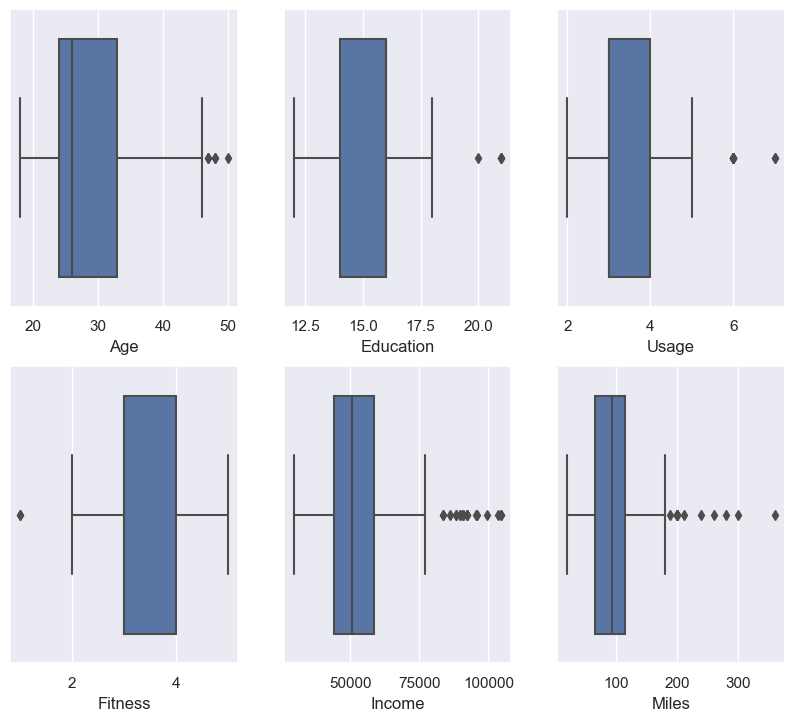

In [10]:

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[0,2])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[1,2])
plt.show()



**Observations:** 

- Age, Education, and Usage have very few outliers.
- While Income and Miles have more outliers.



### Univariate Analysis - Categorical Variables

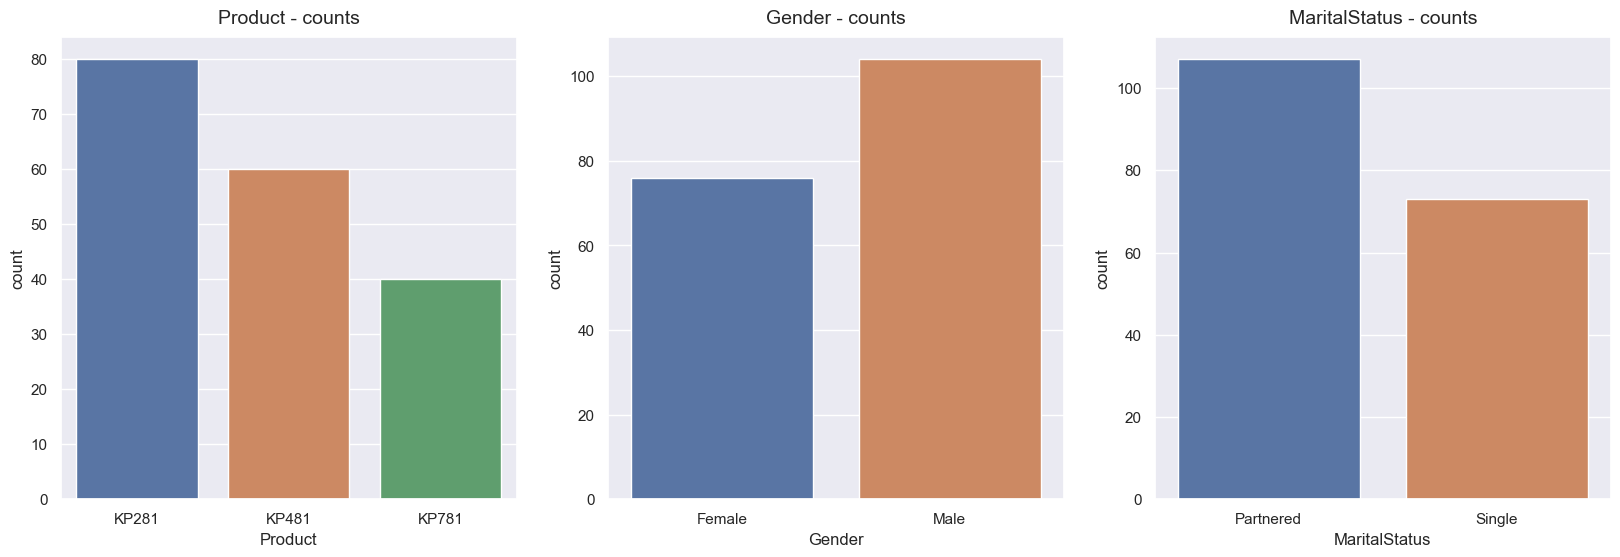

In [11]:
## Count plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()



**Observations**

- KP281 is the most frequent product and best-selling product.
-  In Gender, there are more Males who are using treadmills than Females.
-  The treadmills are more likely to be purchased by partnered people



### Bivariate Analysis

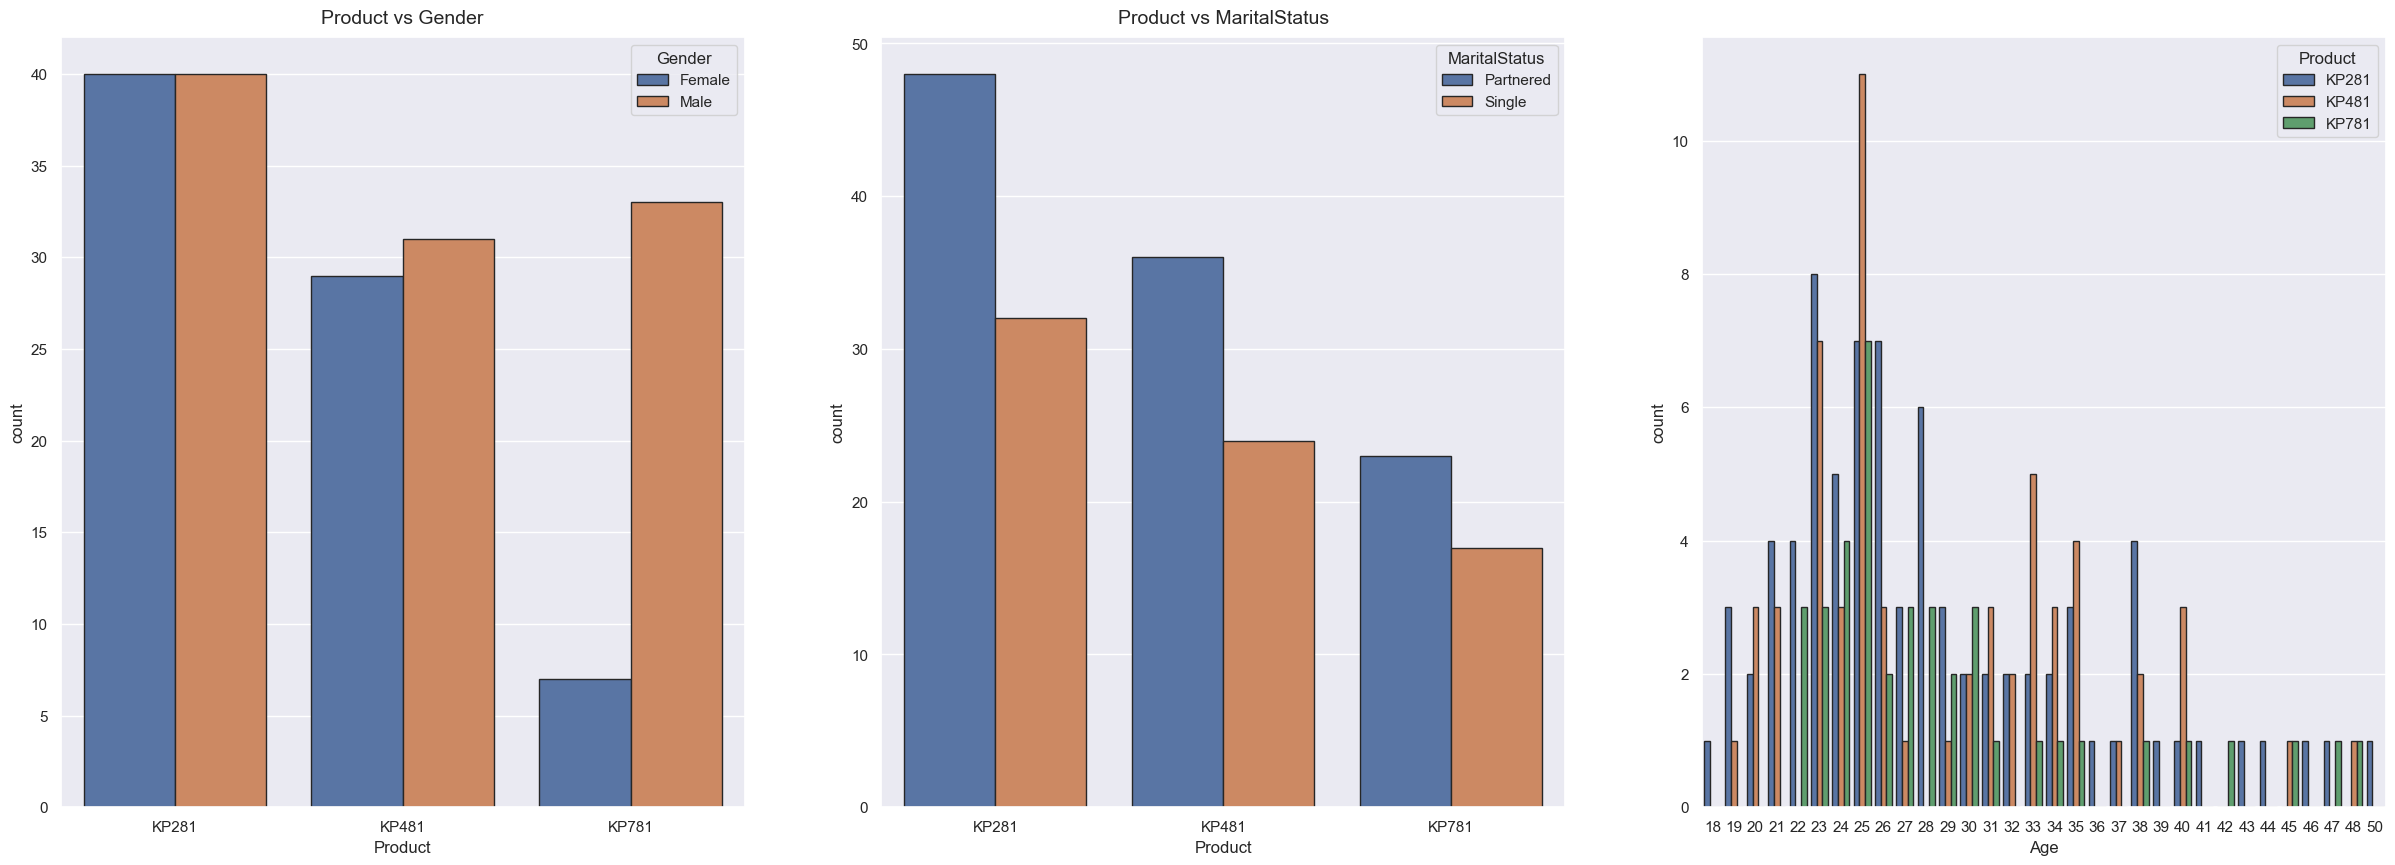

In [12]:
## count plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

### Observations

#### Product vs Gender
- An equal number of males and females have purchased the **KP281** product, and the numbers are nearly the same for the **KP481** product.
- The **KP781** product is predominantly purchased by male customers.

#### Product vs Marital Status
- Customers with a 'Partnered' marital status are more likely to purchase the products.

#### Age vs Product
- Customers aged 25 are more likely to purchase the **KP481** product.


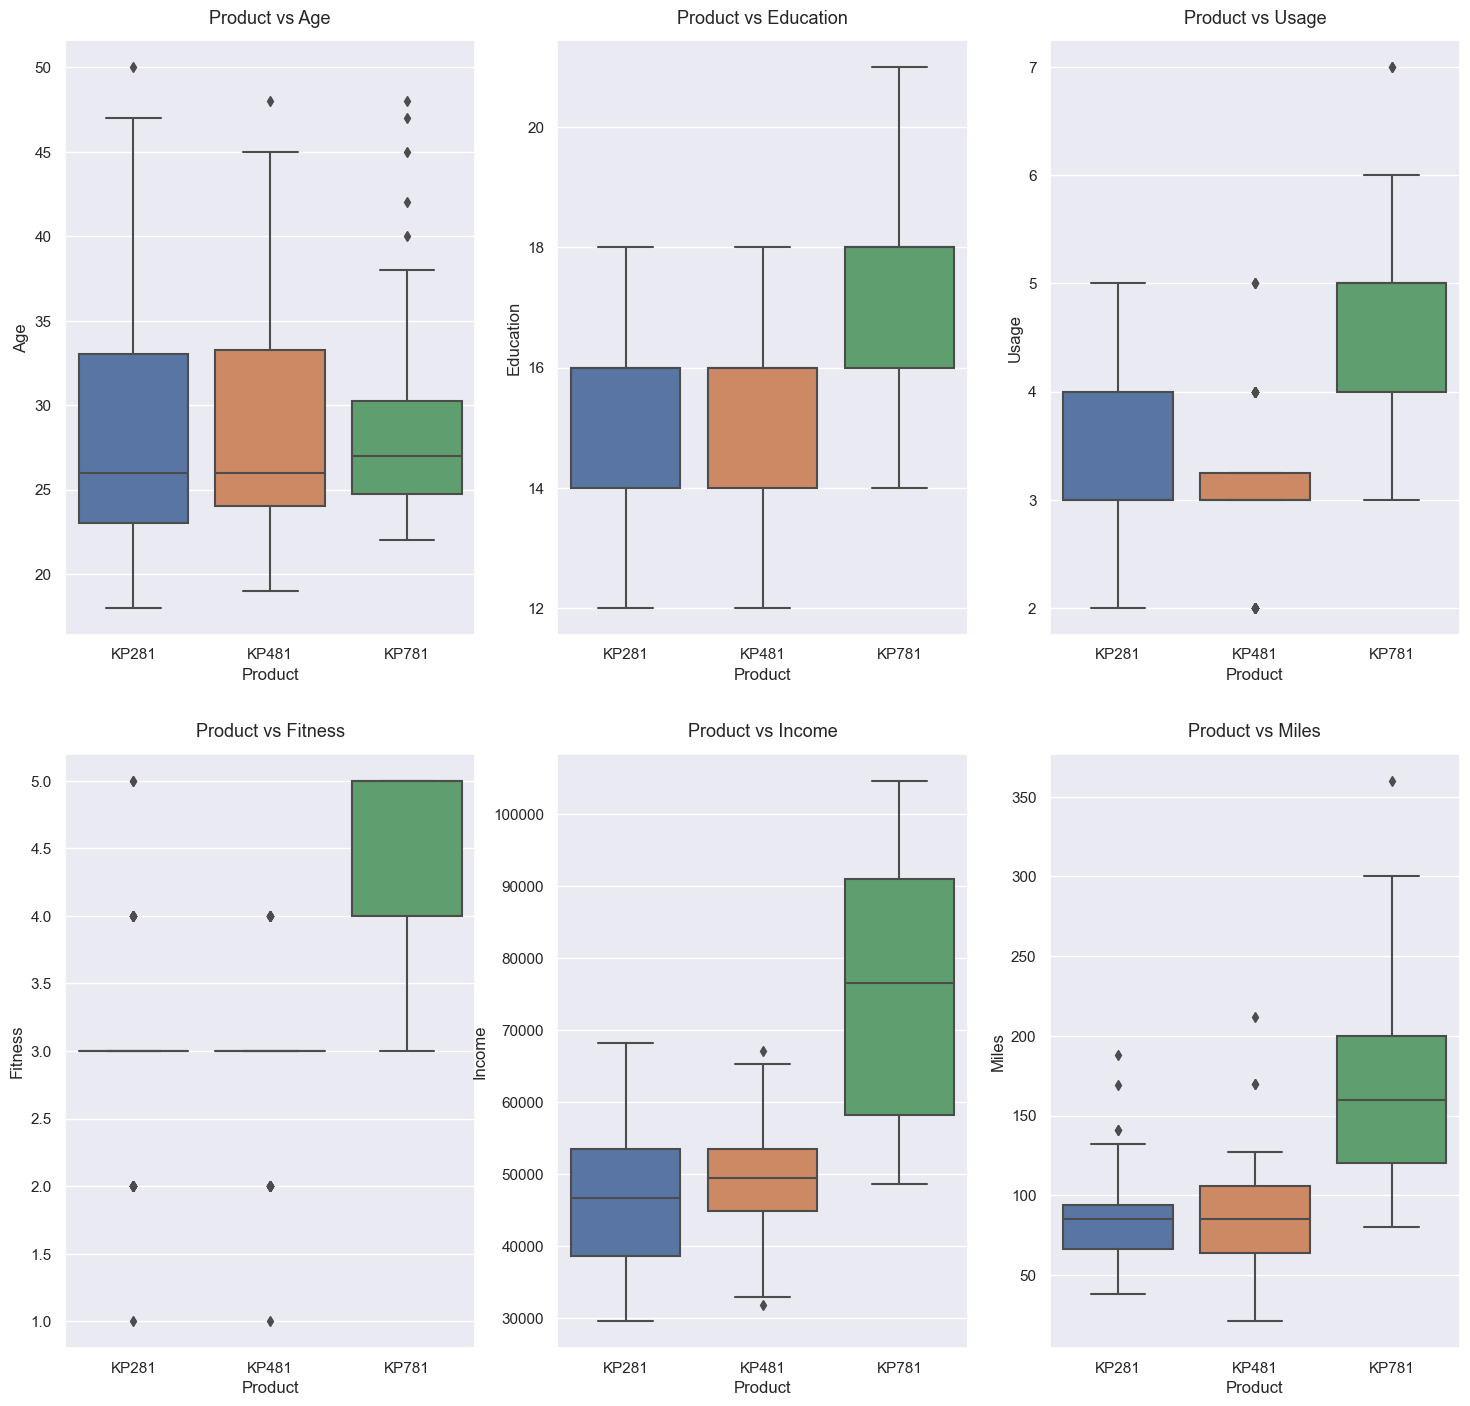

In [13]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1


#### Observations

#### Product vs Age
- Customers purchasing products **KP281** & **KP481** have the same median age value.
- Customers aged between 25-30 are more likely to buy the **KP781** product.

#### Product vs Education
- Customers whose education level is greater than 16 years are more likely to purchase the **KP781** product.
- Customers with an education level less than 16 years have equal chances of purchasing either **KP281** or **KP481**.

#### Product vs Usage
- Customers planning to use the treadmill more than 4 times a week are more likely to purchase the **KP781** product.
- Customers using it less frequently are likely to purchase **KP281** or **KP481**.

#### Product vs Fitness
- The fitter the customer (fitness level >= 3), the higher the chances of purchasing the **KP781** product.

#### Product vs Income
- Customers with an income of $60,000 or more are more likely to purchase the **KP781** product.

#### Product vs Miles
- Customers expecting to walk/run more than 120 miles per week are more likely to purchase the **KP781** product.


In [14]:
for i in range(3):
    for j in range(2):
        print(i,j)

0 0
0 1
1 0
1 1
2 0
2 1


### Univariate Analysis

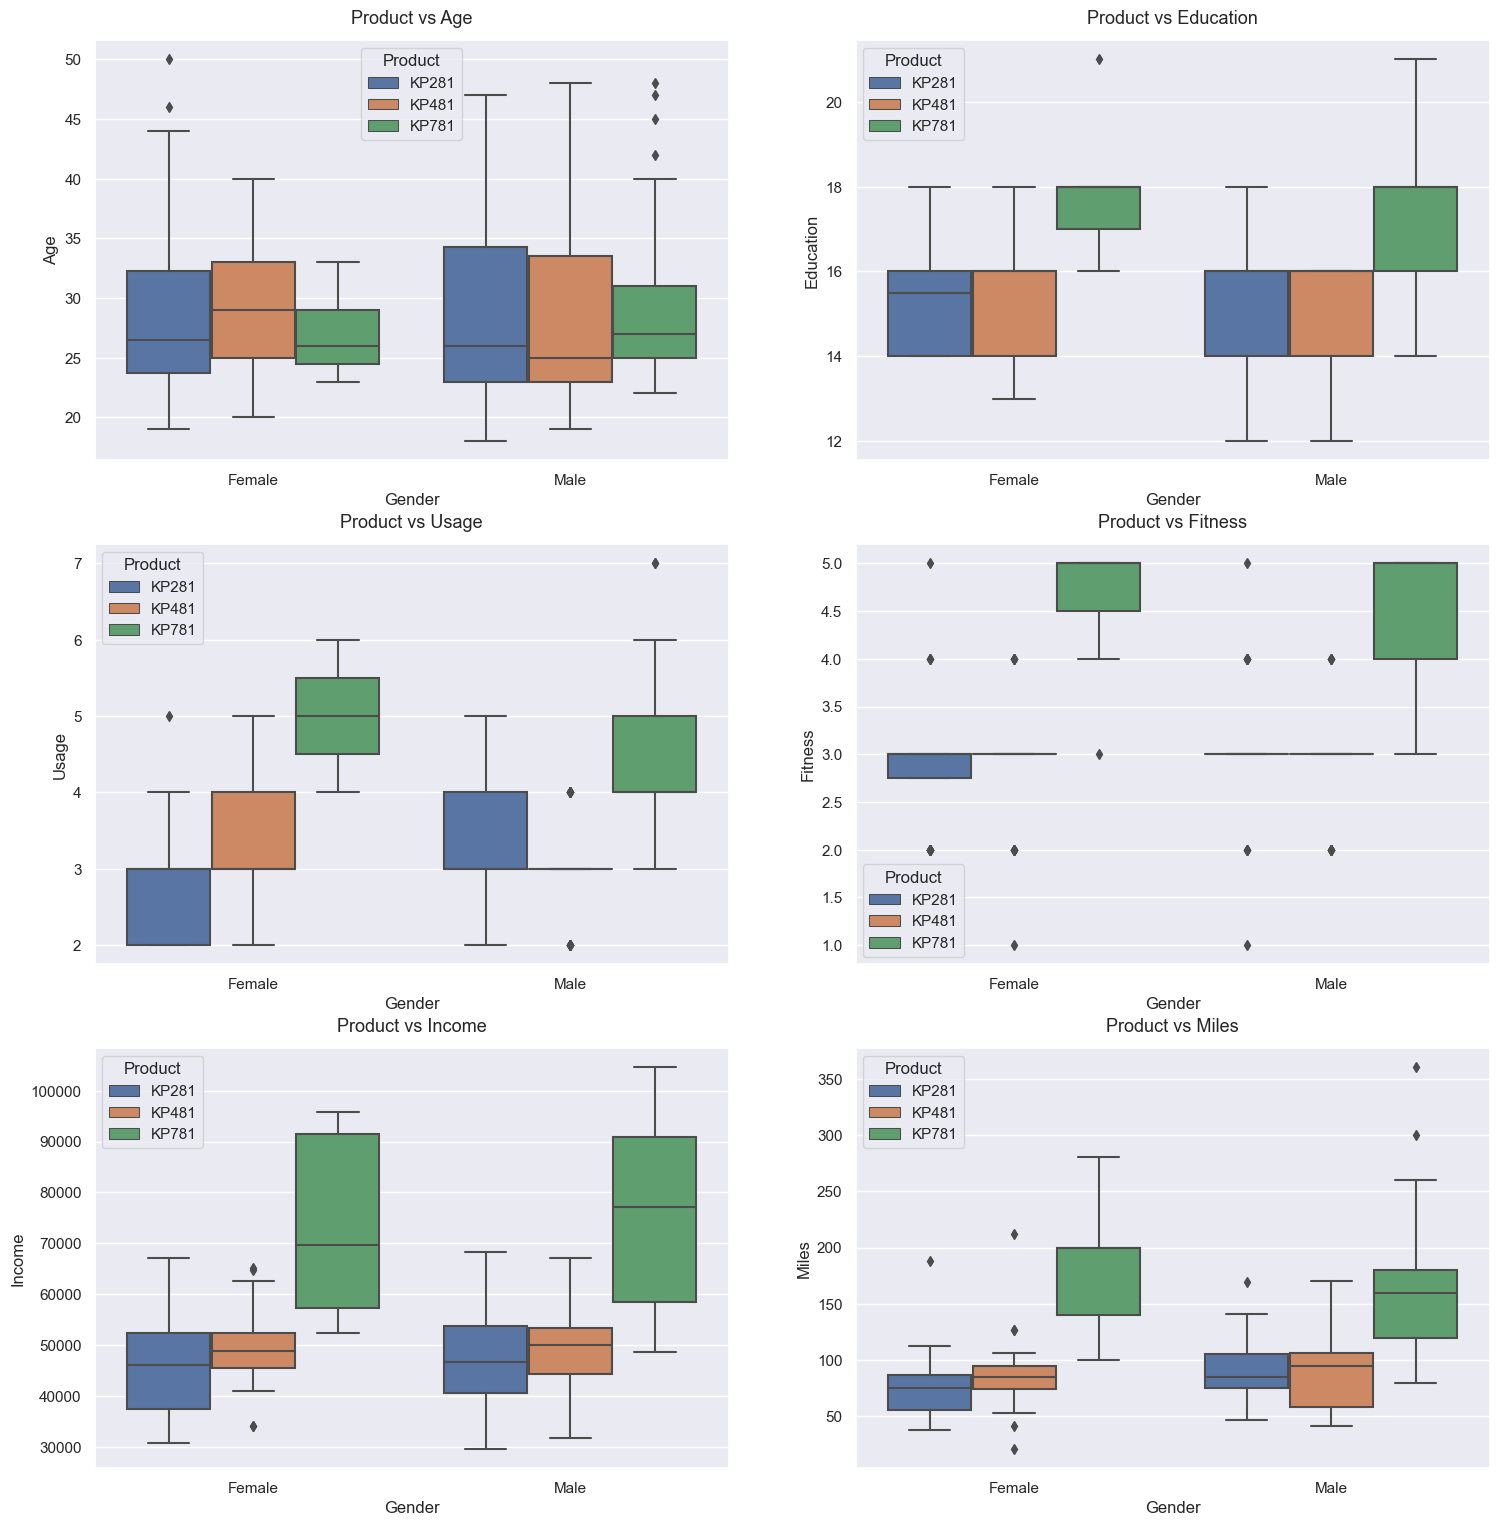

In [16]:
## box plot
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1



--**Obervations**
   
   Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481 product



### Corrrelation 

In [20]:
## get the numeric dtypes
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


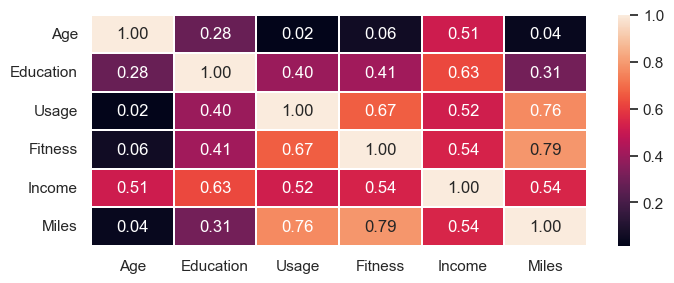

In [24]:

fig, ax = plt.subplots(figsize = (8,3))
sns.set(color_codes = True)
sns.heatmap(numeric_df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()



#### Observations

- Attributes like (Miles & Fitness) and (Miles & Usage) are highly correlated. This indicates that customers with higher fitness levels tend to use treadmills more frequently.

- There is a strong correlation between Income and Education levels. Individuals who are both high-income and highly educated prefer the KP781 treadmill, which features advanced functionalities.

- There appears to be no significant correlation between (Usage & Age) or (Fitness & Age). This suggests that age is not a limiting factor in the usage of treadmills or in the preference for specific treadmill models like the KP781.
